# Árboles de decisión

La clase pasada vimos como implementar un árbol de decisión con sklearn. Ahora que conocemos el procedimiento para armar las condiciones mediante el criterio Gini, armemos nuestro propio árbol...

Hay que tener en cuenta que esto es simplemente para tener una idea de como funcionan estos algoritmos por detrás, pero en la práctica no tiene sentido crear una nueva implementación de árboles de decisión ya que sklearn lo hace muy bien y tiene una gran comunidad que está constantemente desarrollando nuevas soluciones.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Vamos a trabajar con el dataset de titanic (mismo que la clase pasada). Buscaremos predecir si una persona sobrevivió o no.

Vamos a utilizar como punto de partida la siguiente función (que tendrán que editar ustedes):

In [2]:
def predict(x):
    prediction = 0 # MODIFICAR
    
    #### EJEMPLO
    if x.Age < 5: # otra forma es x[5]<5
        prediction = 1
    else:
        prediction = 0
    
    return prediction

Leer el dataset de titanic:


In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Separar en una variable "X" las features que utilizaremos para predecir y en una variable "y" el target que queremos predecir (sobrevivió o no)

In [5]:
X = df.drop('Survived',axis=1)
y = df[['Survived']]

In [6]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Ahora, con la función predict que creamos, predecimos para todas las instancias:

In [8]:
y_predicted = []

for x in X.itertuples(): 
    y_i = predict(x) 
    y_predicted.append(y_i)

print(y_predicted)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Poner el código de la celda anterior en una función que se llame predict_all, reciba como parámetro X y retorne la lista y_predicted

In [9]:
def predict_all(X):
    y_predicted = []

    for x in X.itertuples(): 
        y_i = predict(x) 
        y_predicted.append(y_i)

    return y_predicted

Calculamos el accuracy de nuestro árbol de decisión (que hasta ahora simplemente predice 1 si la edad es menor a 5):

In [10]:
print("Accuracy: ", round(accuracy_score(y_predicted, y), 3))

Accuracy:  0.632


Ahora, para mejorar este simple modelo baseline, utilizaremos lo que aprendimos en la teoría sobre impureza Gini para crear mejores condiciones en nuestra función predict.

### Impureza Gini

Vamos a calcular que tan buenas son las condiciones por Género y Clase para predecir si los pasajeros sobrevivieron o no.


1) Calcular la impureza Gini luego de separar por género.

Recuerden los pasos:

- Calcular la impureza correspondiente al género masculino
- Calcular la impureza correspondiente al género femenino
- Hacer un promedio ponderado

Utilizando una máscara, almacenamos en las variables y_female, y_male la columna survived correspondiente a cada género:

Como no entiendo la redacción anterior anoto los que quiso decir:
  
Proceso visto en clase:
1) Calcular impureza de Gini de las variables "Sex" y "Pclase".(podrian se más)
2) Primero se calcula la impureza de Gini para cada categoria de la variable a evaluar, y luego se realiza un promedio ponderado para obtener la impureza de Gini para la variable. 
   Ejemplo: "Sex"  
   $$G_{sex}=\frac{N_f \cdot G_f+N_m \cdot G_m}{N_f+N_m}$$  
   
   en donde:  
   
   $N_f$ es la cantidad de muestras pertenecientes a la *"categoría femenino"* de la variable "$Sex$"   
   $N_m$ es la cantidad de muestras pertenecientes a la *"categoría masculino"* de la variable "$Sex$"  
   $G_f$ número de Gini para la *"categoría femenino"* de la variable "$Sex$"  
   $G_m$ número de Gini para la *"categoría masculino"* de la variable "$Sex$"  
     
   si '$sex$' fuera una variable '$x$' con $n$ categorias $G_x$ gini de la variable sería: 
   $$G_{x}=\frac{1}{N_x}\displaystyle\sum_{i=1}^{n}{N_n \cdot G_n}$$ 

    en donde:  
   
   $N_x$ es la cantidad total de muestras de la variable "$x$"   
   $N_n$ es la cantidad de muestras pertenecientes a la *"categoría n"* de la variable "$x$"  
   $G_n$ número de Gini para la *"categoría n"* de la variable "$x$"  
   $G_x$ número de Gini para la variable "$x$"    
     
     
3) Fórmula de Gini: (con esta fórmula se calcula el gini de cada categoria de la variable predictora)
   $$G_n=1-\displaystyle\sum_{i=1}^{Ny} (\frac{N_i}{Ny})^2$$
     
   en donde:    
     
   $Ny$ es la cantidad de categorías de "**$y$**"  
   $N_i$ es la cantidad de muestras pertenecientes a la "categoría $i$" de "**$y$**" para la "categoria $n$" de "$x$".  
   $G_n$ es la impuereza de gini para la "categoria $n$" de "$x$".

Se calcula el array "y" de muestras con categoria femenino y masculino

In [11]:
y_female = df[df['Sex']=='female'][['Survived']]
y_male = df[df['Sex']=='male'][['Survived']]

In [12]:
y_female.head()

,Survived
1,1
2,1
3,1
8,1
9,1


In [13]:
y_male.head()

,Survived
0,0
4,0
5,0
6,0
7,0


Ahora, recuenden la fórmula:

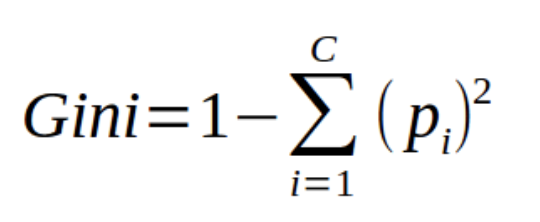



Tenemos que contar para y_female, y_male, la cantidad de muestras positivas y negativas (1s y 0s).  
<span style='color:Peru'>(en realidad es la cantidad de muestras de cada categoría de "y")</span>

Arranquemos por y_female


<span style='color:Peru'>Se cuenta la cantidad de cada categoría de "y" por cada categoría de "Sex"</span>

In [14]:
muestras_0F = y_female.value_counts().get(0) # Una forma de contar
muestras_1F = y_female.value_counts().get(1)
muestras_0M = (y_male==0).sum().values[0]          # Otra forma de contar (esta es mejor)
muestras_1M = (y_male==1).sum().values[0]

muestras_0F,muestras_1F,muestras_0M,muestras_1M

(81, 233, 468, 109)

Necesitamos N (el largo total de la muestra) para poder calcular las probabilidades. N de y_female va a ser igual a el tamaño de y_female:

<span style='color:Peru'>Se calcula el numero total de muestras por cada categoria de "Sex"</span>

In [15]:
NF = len(y_female)
NM= len(y_male)
NF,NM

(314, 577)

Ahora estamos listos para aplicar la fórmula:

<span style='color:peru'>Se calcula la impureza Gini para cada categoría de "Sex" aplicando la fórmula de Gini.</span>

In [16]:
gini_female = 1-((muestras_0F/NF)**2+(muestras_1F/NF)**2)
gini_male = 1-((muestras_0M/NM)**2+(muestras_1M/NM)**2)

In [17]:
print(gini_female,gini_male)

0.3828350034484158 0.3064437162277842


Ahora tenemos que hacer lo mismo para y_male.

Calcular gini_male:

In [18]:
# COMPLETAR

Finalmente, podemos calcular la impureza Gini al separar por género. (Promedio ponderado).

Siguiendo lo que vimos en la teoría, calcular la impureza gini al separar por género:

Pueden guiarse con el ejemplo de la teoría:
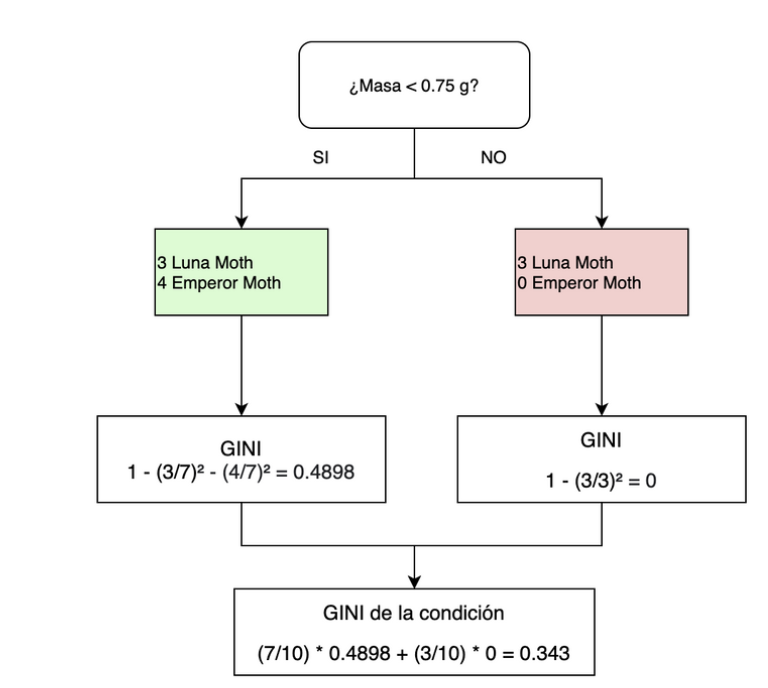

<span style='color:Peru'>Se calcula finalmente la impuereza de Gini de "Sex" haciendo el promedio ponderado de sus "hojas".</span>

In [19]:
gini_genero = (NF/(NF+NM))*gini_female+(NM/(NF+NM))*gini_male
print(f'Impureza Gini al separar por Genero: {gini_genero}')

Impureza Gini al separar por Genero: 0.3333650003885904


<span style='color:peru'>Función para calcular impureza de Gini de una o varias variables.</span>

In [20]:
def fgini(y: str, xs: list, df: pd.DataFrame)-> pd.DataFrame:
    """
    Calcula la impureza de Gini para n variables predictoras en un DataFrame.

    Parámetros:
    - y: Nombre de la variable objetivo.(debe ser categórica)
    - xs: Lista de nombres de las variables predictoras.(deben ser categóricas no hace falta que esten codificadas)
    - df: DataFrame que contiene las variables objetivo y predictoras.

    Devuelve:
    - DataFrame con las impurezas de Gini para cada variable predictora.
    """
    csy = df[y].unique() # Obtiene las categorías de la variable objetivo.
    G_xs = []   # Inicializa lista para almacenar las impurezas de Gini de cada variable predictora
    
    for x in xs:                 # Iterar sobre cada variable predictora
        csx = df[x].unique()    # Obtiene las categorías únicas de la variable predictora
        G_csx =[]   # Inicializa lista para almacenar las impurezas de Gini para cada categoría de la variable predictora. 
        N_csx = []  # Inicializa lista para almacenar número total de muestras para cada categoría de la variable predictora.
        for cx in csx:  # Itera sobre cada categoría de la variable predictora.
            y_cx = df[df[x] == cx][y]   # Seleccionar las muestras correspondientes a la categoría cx de la variable predictora
            Ncx = len(y_cx) # Cuenta el número de muestras en la categoría cx
            # Cuenta la cantidad de muestras para cada categoría de la variable objetivo en la categoría cx
            cx_csy = [(y_cx == cy).sum() for cy in csy] 
            Gcx = 1 - np.sum((np.array(cx_csy) / Ncx) ** 2) # Calcular la impureza de Gini para la categoría cx de la variable predictora
            N_csx.append(Ncx)   # Almacena el número de muestras para la categoría cx
            G_csx.append(Gcx)   # Almacena la impureza de Gini para la categoría cx
        
        Nx = np.sum(N_csx)  # Calcula el número total de muestras para la variable predictora x
        Gx = np.dot(G_csx, N_csx) / Nx  # Calcula la impureza de Gini ponderada para la variable predictora x
        G_xs.append(Gx) # Almacena la impureza de Gini para la variable predictora x
    # Crear un DataFrame con los resultados y establece la variable predictora como índice
    res = pd.DataFrame({'Variable': xs, 'Impureza de Gini': G_xs}).set_index("Variable") 
    return res  # Devuelve el DataFrame con las impurezas de Gini


In [21]:
fgini('Survived',['Sex','Pclass'],df).T

Variable,Sex,Pclass
Impureza de Gini,0.333365,0.418391


In [22]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<span style='color:peru'>Utilizando ***DecisionTreeClassifier*** se muestra el árbol sólo para la variable "Sex" y se calcula la impureza de Gini ponderada de sus hojas.<span>

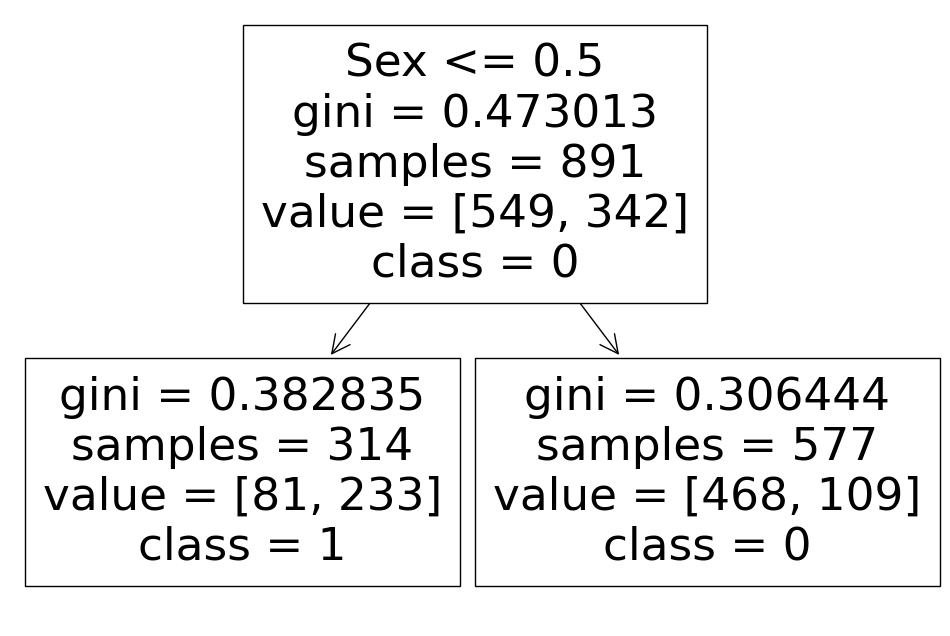

Impureza de Gini para "Sex": 0.33336500038859046


In [23]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Xg es la columna "Sex"
Xg=df.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1).replace({'female':0,'male':1})
yg = df[['Survived']]

tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(Xg,yg)

plt.figure(figsize=(12, 8))
plot_tree(tree1, feature_names=['Sex'], class_names=['0','1'], precision=6)
plt.show()
# gini_sex=(0.30644372*577+0.382835*314)/891
# gini_sex
igs = tree1.tree_.impurity
sps = tree1.tree_.n_node_samples
iG=(sps[1]*igs[1]+sps[2]*igs[2])/(sps[1]+sps[2])
print(f'Impureza de Gini para "Sex": {iG}')

<span style='color:peru'> NOTAR que cuando se le pide impureza de Gini de una variable a DecisionTreeClassifier lo que entrega es la impuerza de gini calculada en base a las categorias de "y" es decir a su propia distribución de sus categorias no a las categorías de "x" a eso le llaman impureza de gini root o raiz, aparentemente en este caso 0.4730129.</span>

In [24]:
muertos=(df['Survived']==0).sum()
vivos=(df['Survived']==1).sum()
total=muertos+vivos
igr=1-((muertos/total)**2+(vivos/total)**2)
igr

0.4730129578614428

In [25]:
gini_impurity_sex_enc = tree1.tree_.impurity[0]

print("Impureza de Gini para 'Sex_Enc':", gini_impurity_sex_enc)

Impureza de Gini para 'Sex_Enc': 0.4730129578614427


Ahora, hacer lo mismo para la variable Clase.

Recuerden que la variable clase tiene 3 categorías, por lo que van a tener 3 hojas y tienen que hacer el cálculo para cada una de ellas.

In [26]:
# COMPLETAR GINI CLASE

## Volvamos a sklearn

Ya vimos como se arma un árbol "a mano". Ahora, volvamos a sklearn 🙌🏻.

La clase pasada entrenamos un modelo para clasificar sobre este mismo dataset.

Vamos a basarnos en el mismo modelo pero haciendo un train - test split.

1) Basandonos en la documentación https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Vemos que uno de los atributos más importantes en train-test split es test_size. Con este parámetro, podemos aclarar que porcentaje de los datos queremos que queden como test.

Otro atributo importante es stratify. 

¿ Para qué sirve stratify ? En la documentación no está muy explicado, pero siempre podemos googlear. Por ejemplo, aca hay una buena respuesta: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Primero analizo el df

In [27]:
info_df = pd.DataFrame(df.dtypes, columns=['Tipo de dato'])
info_df['Valores no nulos'] = df.count()
info_df['NaNs'] = df.isna().sum()
info_df['Valores únicos'] = df.nunique()
info_df['Valores cero'] = (df.eq(0)).sum()
info_df.T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Tipo de dato,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Valores no nulos,891,891,891,891,891,714,891,891,891,891,204,889
NaNs,0,0,0,0,0,177,0,0,0,0,687,2
Valores únicos,891,2,3,891,2,88,7,7,681,248,147,3
Valores cero,0,549,0,0,0,0,608,678,0,15,0,0


Como voy a utilizar age tengo que eliminar o rellenar como en el practico anterior rellene voy a hacer lo mismo. Para comparar con el mismo df.

Primero analizo la distribución por clase.

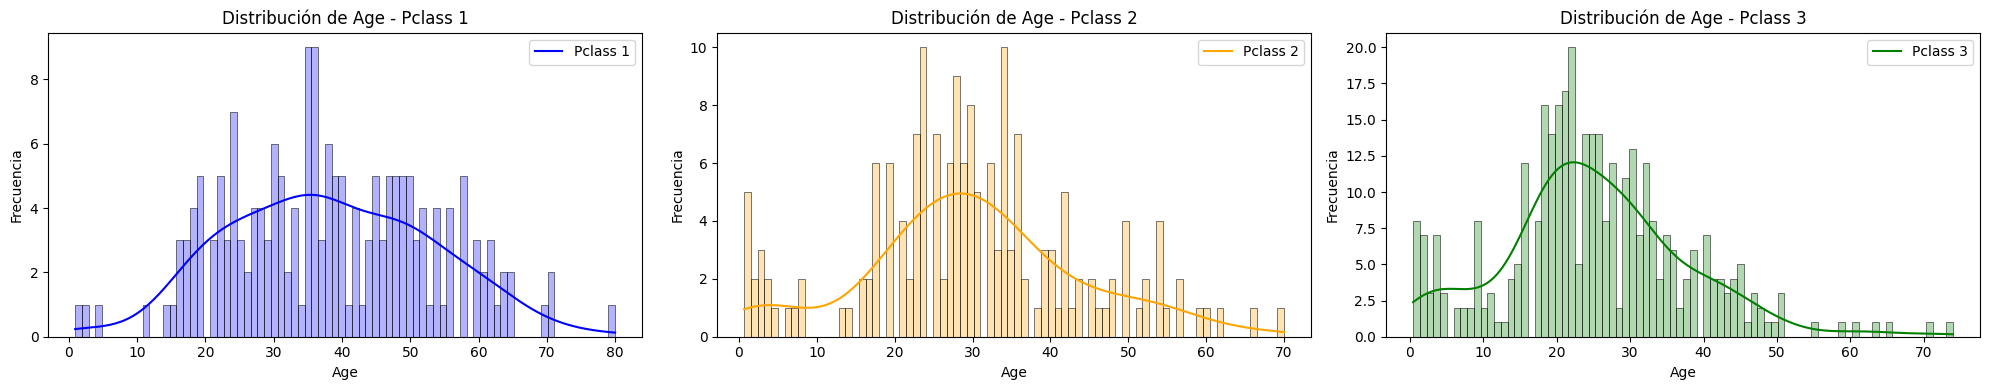

In [28]:
from f_func import histog

histog(df,'Age','Pclass',0,[80],3,[20,4],['blue','orange','green'],1)

Ahora obtengo con rkde los valores de reemplazo. 

In [29]:
from f_func import rkdefit

clases=df['Pclass'].unique()
valores=[]

for i, clase in enumerate(clases):
    cond=df['Pclass'] == clase
    val=rkdefit(df[cond]['Age'],0,80)
    valores.append(val)
    print(f'Clase {clase} n={len(valores[i])}, min val={min(valores[i])}, max val={max(valores[i])}')
    print(f'NaNs: {df[cond]["Age"].isna().sum()}')

Clase 3 n=136, min val=1, max val=57
NaNs: 136
Clase 1 n=30, min val=11, max val=66
NaNs: 30
Clase 2 n=11, min val=14, max val=55
NaNs: 11


Efectuo los reemplazos de NaNs.

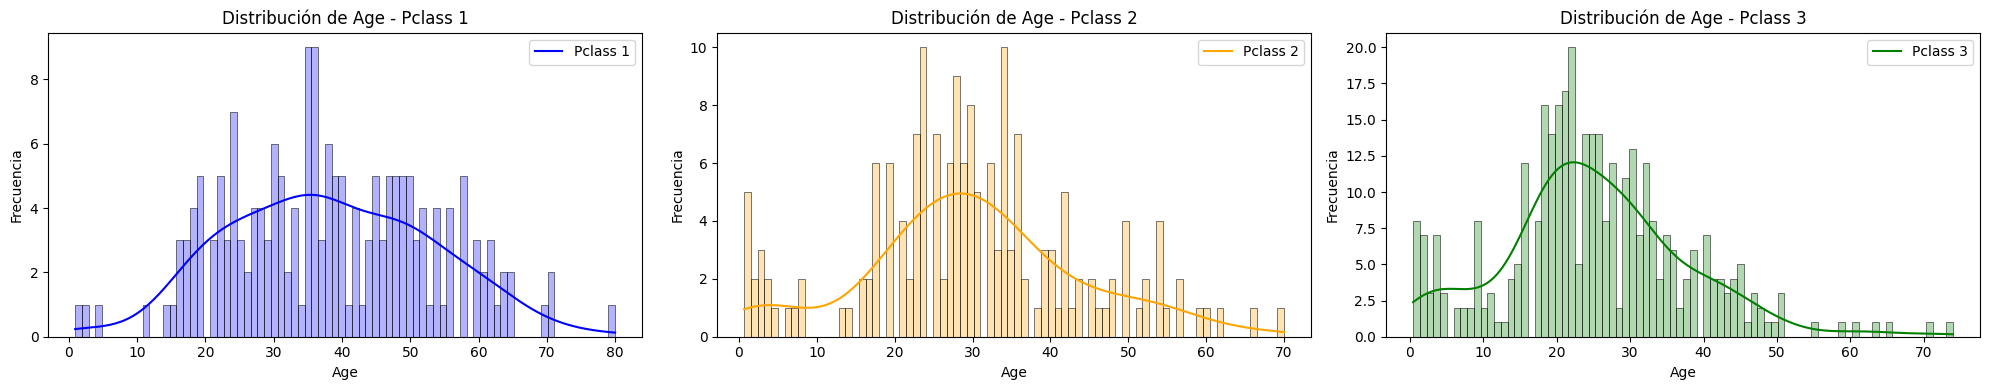

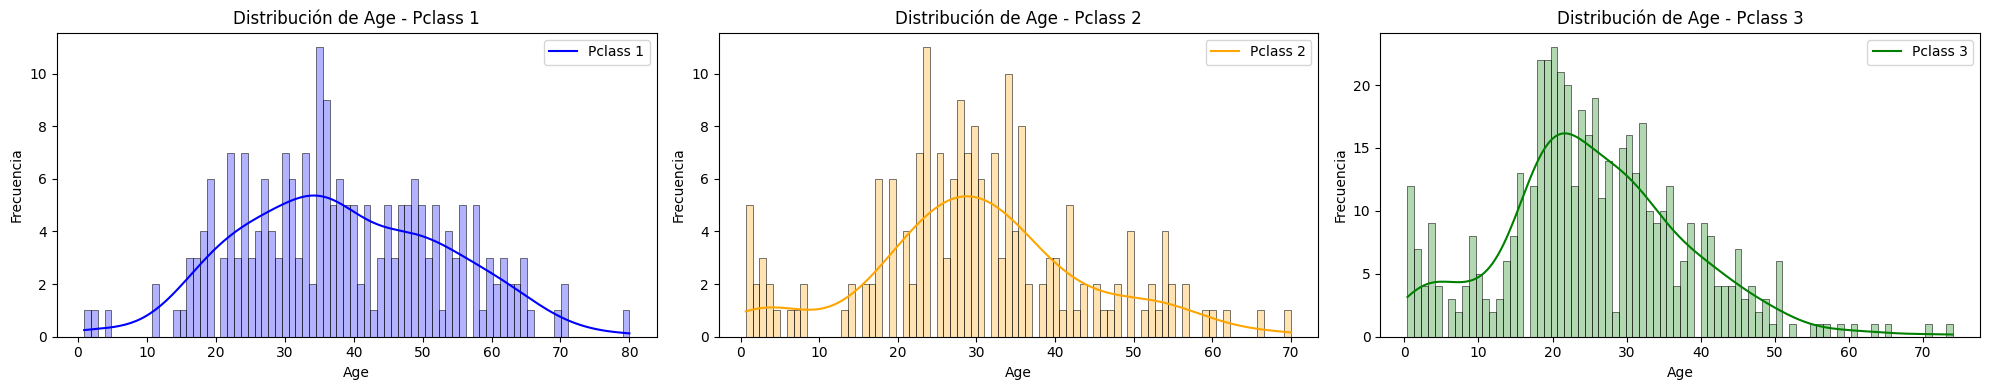

In [30]:
dfa=df.copy()
for i,clase in enumerate(clases):
    dfa.loc[(dfa['Pclass'] == clase) & dfa['Age'].isna(), 'Age'] = valores[i]

histog(df,'Age','Pclass',0,[80],3,[20,4],['blue','orange','green'],1)
histog(dfa,'Age','Pclass',0,[80],3,[20,4],['blue','orange','green'],1)

Comprobación de que no quedaron NaNs.

In [31]:
dfa['Age'].isna().sum()

0

In [32]:
# IMPORTAR train_test_split de sklearn
from sklearn.model_selection import train_test_split

Ahora, aplicamos el train_test_split:

In [33]:
dfa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El prepocesamiento va acá.

In [34]:
dfa['Sex_Enc']=dfa['Sex'].replace({'female':0,'male':1})
dfa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [35]:
X = dfa.drop(['Survived','PassengerId','Name','Ticket','Cabin','Embarked','Sex'], axis=1) # Basarse en las columnas que eligieron para su modelo la clase pasada
y = dfa[["Survived"]]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Enc
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape

(712, 6)

In [38]:
X_test.shape

(179, 6)

In [39]:
y_train.shape

(712, 1)

In [40]:
y_test.shape

(179, 1)

Ya tenemos nuestros datos divididos en train - test.

Ahora, hay que aplicar todo el preprocesamiento que decidieron hacer la última clase (copiar y pegar) sobre el set de train.


In [41]:
# COMPLETAR PREPROCESSING TRAIN

Entrenamos nuestro decision tree

In [42]:
# Entrenar decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Y ahora lo queremos evaluar.

Para esto, vamos a medir el accuracy score con el set de train (X_train, y_train) y con el set de test (X_test, y_test).

Para poder generar predicciones sobre X_test, tenemos que aplicar el mismo preprocesamiento que hicimos sobre el set de train, pero esta vez al set de test.

Para esto, tenemos que utilizar los mismos objetos que utilizamos para transformar los datos en train; es decir, que si utilizaron un OneHotEncoder al cual le hicieron fit con datos de train, cuando vayan a aplicar la transformación a los datos de test NO tienen que volver a hacer el fit. Simplemente hacen un transform. Esto es para que se aplique sobre test la misma transformación que se aplico en train.

Siempre hacemos fit sobre los datos de train y luego solo utilizamos transform.

Aplicar las transformaciones sobre el set de test:

In [43]:
# COMPLETAR

Generar las predicciones para train y para test:

In [44]:
yp_test=tree.predict(X_test)
yp_train=tree.predict(X_train)

accuracy_score(y_test,yp_test),accuracy_score(y_train,yp_train)

(0.8379888268156425, 0.8216292134831461)

Conclusión NO está optimizada la profundiad del arbol pues el accuracy de train es más baja que la del test.

Vamos a optimizar.

In [45]:
from sklearn.model_selection import GridSearchCV
p_depth = {'max_depth': np.arange(1,30)}
grid_search = GridSearchCV(tree, p_depth, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Imprimir los mejores parámetros y el desempeño asociado
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión en entrenamiento:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 5}
Mejor precisión en entrenamiento: 0.8187727765192554


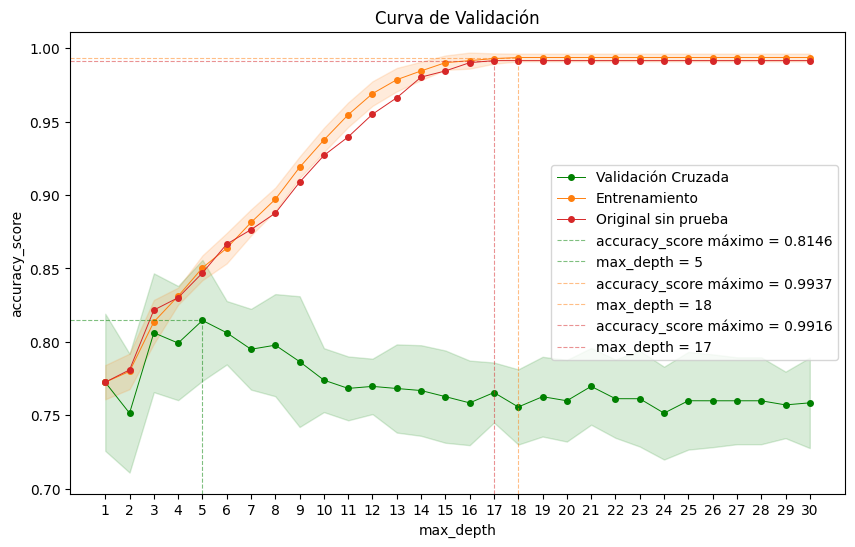

In [46]:
from f_func import bestParam
_=bestParam(X_train,y_train,tree,['max_depth',1,30],accuracy_score,maxim=1,cv=5,g=1,fig=(10,6),colores=['green','#FF7F0E','#D62728'])

In [47]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [48]:
yp_test=tree.predict(X_test)
yp_train=tree.predict(X_train)

accuracy_score(y_test,yp_test),accuracy_score(y_train,yp_train)

(0.8156424581005587, 0.8764044943820225)

La accuracy_score del train aumentó y el de test disminuyo un poco pero es aleatorio según la partición para test.

In [49]:
# train_preds = MODELO.predict(X_train)
# test_preds = MODELO.predict(X_test)

Y calcular el accuracy score para ambos:

In [50]:
# accuracy_score(y_train, train_preds)

In [51]:
# accuracy_score(y_test, test_preds)

¿ Qué conclusiones pueden sacar de estos resultados ?

¿ El modelo es bueno para predecir sobre datos nuevos ?

¿ Les dio mejor la métrica en train o en test ? ¿ Por qué ?

Un modelo que nos de métricas muy buenas sobre el set de train (por ejemplo 98% de accuracy score) pero malas sobre test. ¿ Qué problema tiene ?

# Visualizando decision trees

SKlearn nos permite ver como se armó un arbol de decisión.

Para esto podemos utilizar: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Primero que nada vamos a importar el dataset de iris desde sklearn y dividirlo en X e y para entrenar un árbol (por simplicidad le ponemos max_depth=2):

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
Xi = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
yi = pd.DataFrame(iris.target, columns =["Species"])

treei = DecisionTreeClassifier(max_depth = 2)
treei.fit(Xi,yi)

DecisionTreeClassifier(max_depth=2)

In [53]:
iris.feature_names[:]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
Xi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
yi.head()

,Species
0,0
1,0
2,0
3,0
4,0


Ahora, con plot_tree de sklearn, podemos visualizar nuestro árbol para entender como toma decisiones para clasificar:

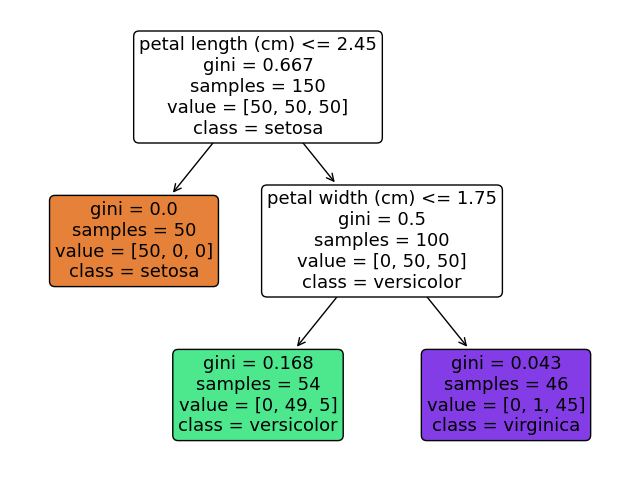

In [57]:
from sklearn.tree import plot_tree

# plot_tree(treei)
# plt.show()

plt.figure(figsize=(8, 6))
plot_tree(treei, feature_names=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'], class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True)
plt.show()

In [58]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
nombres_x=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

fgini('species',nombres_x,iris_df).T

Variable,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Impureza de Gini,0.319407,0.467675,0.062667,0.062778


Como igini de ***petal length*** es la menor empieza dividiendo por esa y luego sigue por ***petal width***.